In [1]:
import os
os.environ['PROJ_LIB'] = 'E:/jupyter/Lib/site-packages/mpl_toolkits/basemap'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

E:\jupyter\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror.drop(['Summary','Weapon_type','Target_type','Motive'],axis = 1)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,Unknown
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,Black Nationalists
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay)
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,Unknown
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang


In [299]:
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [300]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [301]:
terror.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
dtype: object

In [314]:
terror.fillna({'Killed':0, 'Wounded':0},inplace = True)
terror['Casaulities'] = terror.Killed+terror.Wounded
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casaulities         0
dtype: int64

In [303]:
num_terror = terror.Year.value_counts(sort = False,ascending =True)

In [304]:
sns.set(rc={'figure.figsize':(20,10)})

([<matplotlib.axis.XTick at 0x1bc42c87c18>,
 <a list of 47 Text xticklabel objects>)

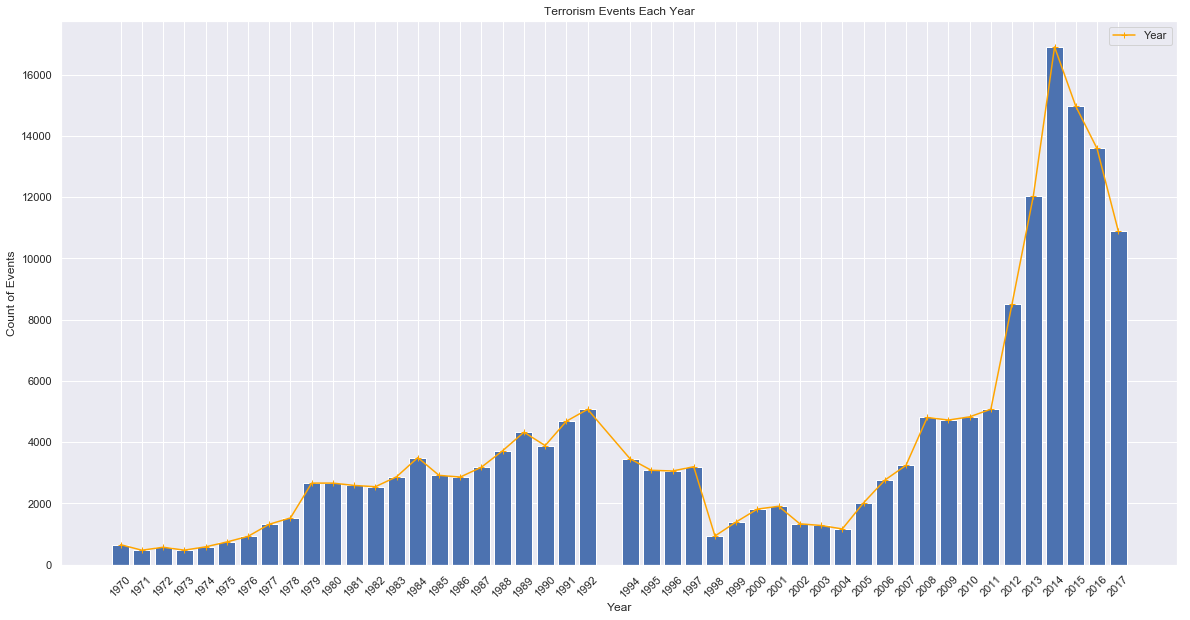

In [315]:
plt.bar(num_terror.index, num_terror)
plt.plot(num_terror,color = 'orange',marker='+')
plt.legend()
plt.title('Terrorism Events Each Year')
plt.ylabel('Count of Events')
plt.xlabel('Year')
plt.xticks(num_terror.index,rotation = 45)

([<matplotlib.axis.XTick at 0x1bc42eb7860>,
 <a list of 47 Text xticklabel objects>)

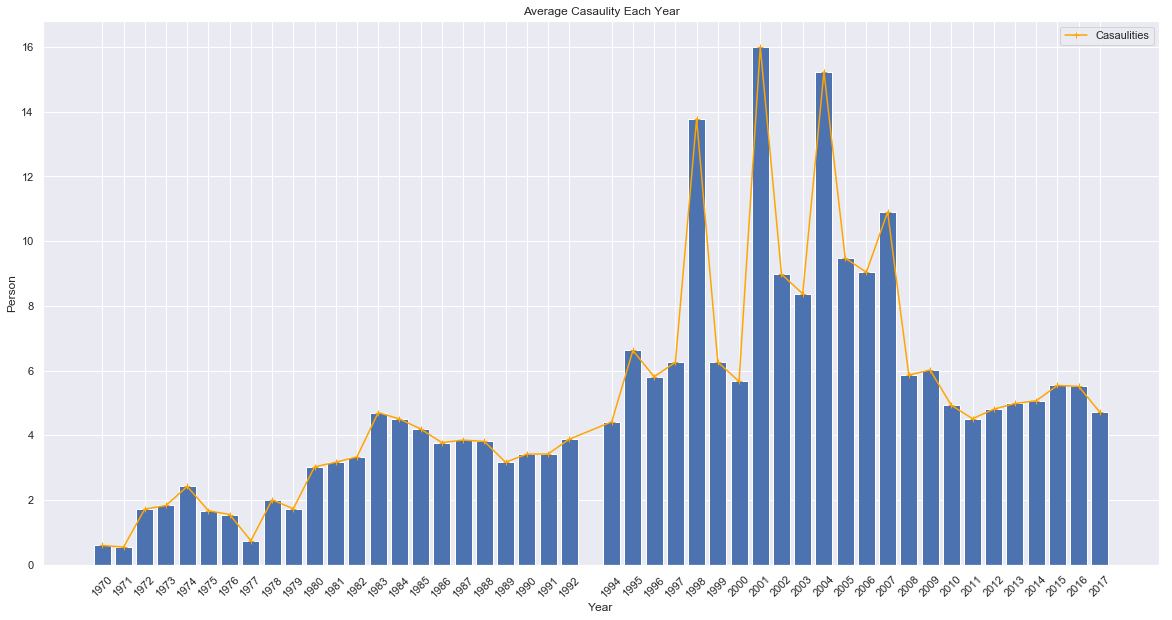

In [316]:
num_cas=terror.groupby("Year").mean().Casaulities
plt.plot(num_cas,color = 'orange',marker='+')
plt.bar(num_cas.index,num_cas)
plt.legend()
plt.title('Average Casaulity Each Year')
plt.ylabel('Person')
plt.xlabel('Year')
plt.xticks(num_cas.index,rotation = 45)

Text(0.5, 1.0, 'Number of terrorism attack in each area')

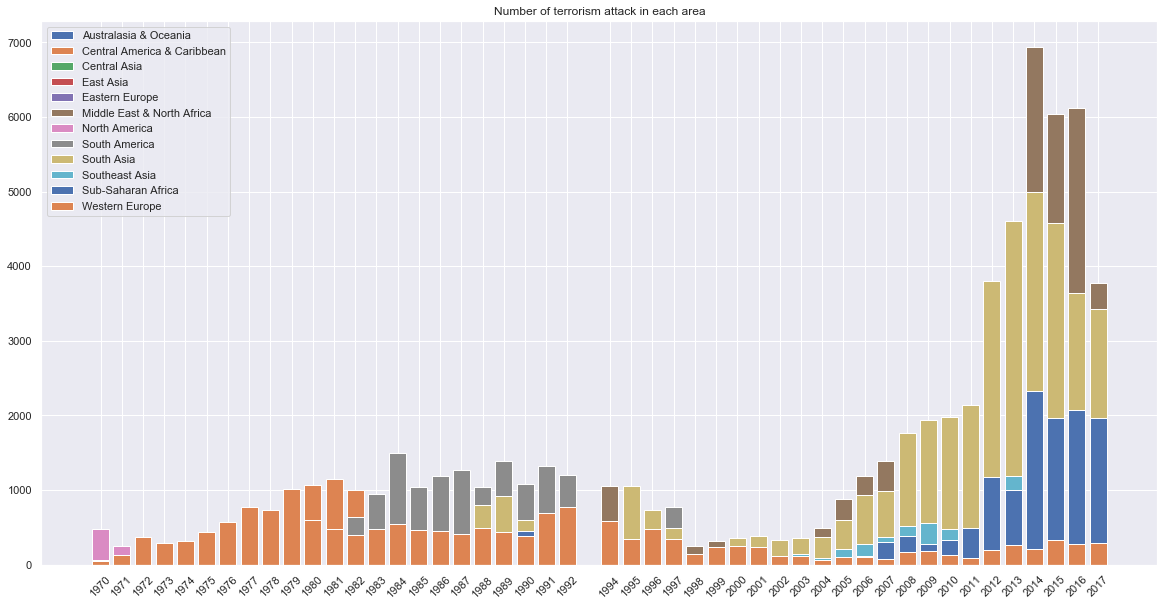

In [307]:
region = terror.groupby("Region").Casaulities.sum().index
for i in region:
    region_ter = terror[terror.Region == i].Year.value_counts(sort = False,ascending =True)
    plt.bar(region_ter.index,region_ter)
plt.legend(region)
plt.xticks(x.index,rotation = 45)
plt.title("Number of terrorism attack in each area")

Text(0.5, 1.0, 'Number of total casaulities in each area')

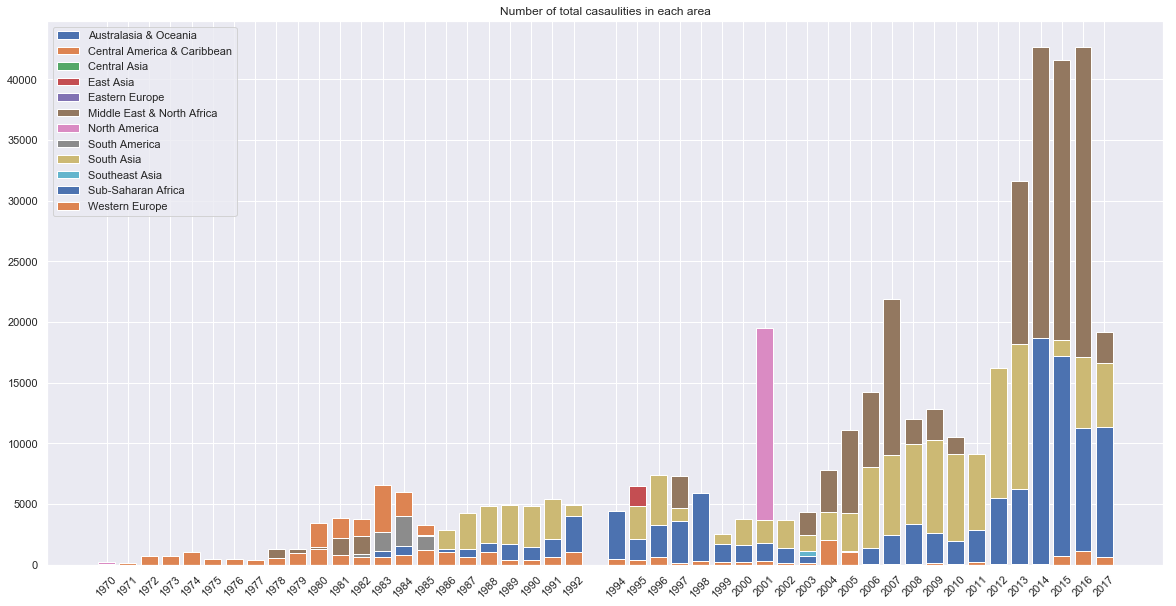

In [308]:
region = terror.groupby("Region").Casaulities.sum().index
for i in region:
    x = terror[terror["Region"] == i].groupby("Year").sum().Casaulities
    plt.bar(x.index,x)
plt.legend(region)
plt.xticks(x.index,rotation = 45)
plt.title("Number of total casaulities in each area")

In [309]:
terror.AttackType.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

Text(0.5, 1.0, 'Attack type count change over time')

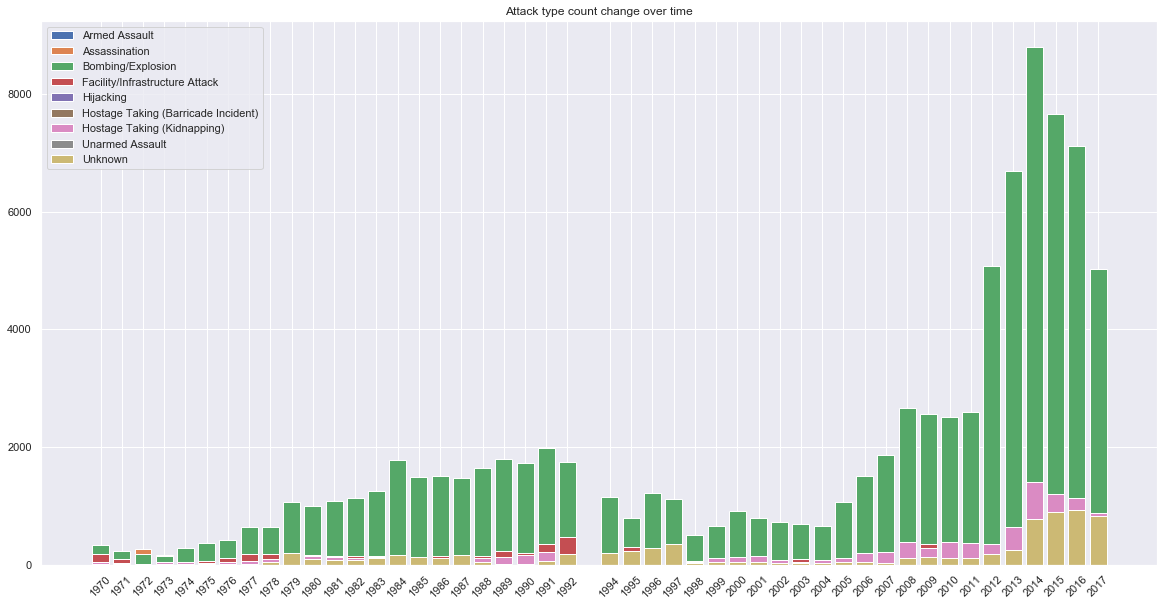

In [310]:
attype = terror.groupby("AttackType").Casaulities.sum().index
for i in attype:
    x = terror[terror["AttackType"] == i].Year.value_counts(sort = False,ascending =True)
    plt.bar(x.index,x)
plt.legend(attype)
plt.xticks(x.index,rotation = 45)
plt.title("Attack type count change over time")

In [311]:
terror.Target_type.unique().shape

(22,)

In [312]:
terror.Target_type.unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)